In [1]:
import pandas as pd
import numpy as np                # Numerical Python; Arrays ; Multi dimentional objects
import matplotlib.pyplot as plt   # creating static, animated, and interactive visualizations in Python
import datetime as dt
import seaborn as sns     # data visualization library
import re                 # Regular Expressions

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
custaq = pd.read_csv("Customer Acqusition.csv")
custaq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [3]:
spend = pd.read_csv("spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [4]:
repay = pd.read_csv("Repayment.csv")
repay

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [5]:
repay.dropna(how = "all",axis='columns',inplace=True)
repay

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1518,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN


In [6]:
repay.dropna(how = "all",axis='rows',inplace=True)
repay

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [7]:
repay = repay.drop(repay.columns[0],axis=1)
repay

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [8]:
repay["Month"]=pd.to_datetime(repay["Month"])

In [9]:
spend["Month"]=pd.to_datetime(spend["Month"])

In [61]:
repay.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [62]:
spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [10]:
spend = spend.drop(spend.columns[0],axis=1)
spend

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


# 1 a) In case age is less than 18, replace it with mean of age values.


In [15]:
custaq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [16]:
custaq.loc[custaq["Age"] < 18,"Age"]=int(custaq["Age"].mean())
custaq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [17]:
merge1 = pd.merge(left = custaq, right = spend, how = 'inner', left_on = 'Customer', right_on = 'Customer')
merge1

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [18]:
merge1.loc[merge1["Amount"] > merge1["Limit"],"Amount"] = merge1["Limit"]*(50/100)
merge1

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


# c.Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [19]:
merge2 = pd.merge(left = custaq, right = repay, how = 'inner', left_on = 'Customer', right_on = 'Customer')
merge2

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [20]:
merge2.loc[merge2["Amount"] > merge2["Limit"],"Amount"] = merge2["Limit"]
merge2

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


# 2.a) How many distinct customers exist?

In [21]:
custaq["Customer"].nunique()
#dataframe.nunique() function return Series with number of distinct observations over requested axis. 

100

# 2.b) How many distinct categories exist

In [84]:
custaq["Product"].nunique()

3

In [86]:
custaq["Segment"].nunique()

5

In [87]:
custaq["City"].nunique()

8

# 2.c) What is the average monthly spend by customers?


In [103]:
spend["Month"] = pd.to_datetime(spend["Month"])
spend["mon"] = spend["Month"].dt.month
avgspend = spend.groupby(["Customer","mon"])[['Amount']].mean()
avgspend.head(25)

Amount
Customer mon               
A1       1    372762.587143
         2    175235.690000
         4    261649.250000
         5    361141.310000
         8    344372.100000
         10   244534.680000
         11   183839.610000
A10      1    161144.326667
         2    194557.667500
         3    134631.266667
         4    270721.680000
         5    189207.392500
         7    239798.030000
         8    454827.230000
         11   459690.690000
A100     1    224786.880000
A11      1    130298.903333
         2    237842.337500
         3    177102.153333
         4    483603.210000
         5    323982.030000
         6    283779.680000
         8    404113.850000
         9     67560.480000
         11   472854.210000

In [16]:
spend['month'] = spend['Month'].dt.month_name()
avgspend = spend.groupby(["Customer","month"])[['Amount']].mean().reset_index()
display(pd.DataFrame(avgspend).head(25))

,Customer,month,Amount
0,A1,April,261649.250000
1,A1,August,344372.100000
2,A1,February,175235.690000
3,A1,January,372762.587143
4,A1,May,361141.310000
5,A1,November,183839.610000
6,A1,October,244534.680000
7,A10,April,270721.680000
8,A10,August,454827.230000
9,A10,February,194557.667500


In [94]:
spend.Amount.sum()/len(spend.Amount)

243096.04946

# 2.d)What is the average monthly repayment by customers?

In [22]:
repay['month'] = repay['Month'].dt.month_name()
avgrepay = repay.groupby(["Customer","month"])[['Amount']].mean().reset_index()
display(pd.DataFrame(avgrepay).head(25))

,Customer,month,Amount
0,A1,April,254474.580000
1,A1,February,156374.760000
2,A1,January,343972.327143
3,A1,July,297176.740000
4,A1,November,285729.090000
5,A1,September,186427.500000
6,A10,April,159582.470000
7,A10,February,217344.503333
8,A10,January,272897.385000
9,A10,July,358194.650000


In [95]:
repay.Amount.sum()/len(repay.Amount)

247890.05442

# 2.e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [40]:
data = pd.merge(left = spend, right = repay, how = 'inner', left_on = 'Customer', right_on = 'Customer')
data

,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,month
0,A1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January
1,A1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,January
2,A1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,January
3,A1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,January
4,A1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,January
...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,2005-11-22,55108.71,November
37280,A7,2006-04-19,JEWELLERY,165956.43,2005-12-03,429700.12,December
37281,A7,2006-04-19,JEWELLERY,165956.43,2005-02-23,344628.72,February
37282,A7,2006-04-19,JEWELLERY,165956.43,2006-03-31,336264.37,March


In [21]:
del data["month_x"]

In [41]:
data

,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,month
0,A1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January
1,A1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,January
2,A1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,January
3,A1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,January
4,A1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,January
...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,2005-11-22,55108.71,November
37280,A7,2006-04-19,JEWELLERY,165956.43,2005-12-03,429700.12,December
37281,A7,2006-04-19,JEWELLERY,165956.43,2005-02-23,344628.72,February
37282,A7,2006-04-19,JEWELLERY,165956.43,2006-03-31,336264.37,March


In [42]:
#Monthly Profit = Monthly repayment – Monthly spend.
data["Profit"] = data["Amount_y"] - data["Amount_x"]
data

,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,month,Profit
0,A1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,9943.95
1,A1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,January,-239571.78
2,A1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,January,-225980.74
3,A1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,January,-47915.68
4,A1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,January,-319497.92
...,...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,2005-11-22,55108.71,November,-110847.72
37280,A7,2006-04-19,JEWELLERY,165956.43,2005-12-03,429700.12,December,263743.69
37281,A7,2006-04-19,JEWELLERY,165956.43,2005-02-23,344628.72,February,178672.29
37282,A7,2006-04-19,JEWELLERY,165956.43,2006-03-31,336264.37,March,170307.94


In [32]:
data["Interest"] = pd.Series() # empty series
data.loc[data["Profit"] > 0,"Interest"] = round(data["Profit"]*(2.9/100),2)
#data['Interest']=np.where(data['Profit']>0, data['Profit']*2.9/100, np.nan) - > if else

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_19928/1424163318.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["Interest"] = pd.Series() # empty series


In [27]:
data

,Customer,Month_x,Type,Amount_x,Month_y,Amount_y,Profit,Interest
0,A1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,9943.95,288.37
1,A1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,-239571.78,NaN
2,A1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,-225980.74,NaN
3,A1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,-47915.68,NaN
4,A1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,-319497.92,NaN
...,...,...,...,...,...,...,...,...
37279,A7,2006-04-19,JEWELLERY,165956.43,2005-11-22,55108.71,-110847.72,NaN
37280,A7,2006-04-19,JEWELLERY,165956.43,2005-12-03,429700.12,263743.69,7648.57
37281,A7,2006-04-19,JEWELLERY,165956.43,2005-02-23,344628.72,178672.29,5181.50
37282,A7,2006-04-19,JEWELLERY,165956.43,2006-03-31,336264.37,170307.94,4938.93


In [33]:
data["Month_y"] = pd.to_datetime(data["Month_y"])
data["month"] = data["Month_y"].dt.month_name()
data.groupby("month")[["Profit","Interest"]].sum()

,Profit,Interest
month,,
April,5.932509e+07,10183887.47
August,6.506634e+06,2993285.63
December,2.770094e+07,1866660.72
February,1.639832e+07,13876326.58
January,2.158592e+06,19162538.17
July,1.235603e+07,2785932.98
June,-3.483745e+07,2618139.27
March,-1.018283e+07,11606196.30
May,1.584553e+08,18998421.19


# 2.f) What are the top 5 product types

In [31]:
del spend["month"]
spend

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73
1496,A68,2006-03-25,BUS TICKET,204971.10
1497,A69,2006-03-31,BUS TICKET,50449.44
1498,A70,2006-03-23,BUS TICKET,80593.94


In [34]:
spend.groupby(by="Type")[["Amount"]].sum().sort_values("Amount",ascending=False).head(5).reset_index()

,Type,Amount
0,PETRO,49863174.09
1,CAMERA,41481571.96
2,FOOD,37773338.43
3,TRAIN TICKET,33067077.15
4,AIR TICKET,32955445.42


# 2.g) Which city is having maximum spend?

In [36]:
data = pd.merge(left = custaq, right = spend, how = 'inner', left_on = 'Customer', right_on = 'Customer')
data

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [44]:
data.groupby(by ="City")[["Amount"]].sum().sort_values("Amount",ascending=False).head(1)


,Amount
City,
COCHIN,73495349.26


# 2.h) Which age group is spending more money?


In [46]:
data.groupby(by ="Age")[["Amount"]].sum().sort_values("Amount",ascending=False).head(1)


,Amount
Age,
28,25098877.03


# 2.h )Who are the top 10 customers in terms of repayment?

In [48]:
repay.groupby(by="Customer")[["Amount"]].sum().sort_values("Amount",ascending=False).head(10)


,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
data = pd.merge(left = custaq, right = spend, how = 'inner', left_on = 'Customer', right_on = 'Customer')
data

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [54]:
data["Month"] = pd.to_datetime(data["Month"])
data["year"] = data["Month"].dt.year
visualize = pd.pivot_table(data = data, index = 'City', columns=['Product','year'], 
               values='Amount', aggfunc='sum')

In [55]:
visualize

Product           Gold                              Platimum               \
year              2004         2005         2006        2004         2005   
City                                                                        
BANGALORE   9289878.54  12892362.99  12030611.09  6046763.93   7784194.68   
BOMBAY      6987853.53   8983018.28   7917144.31  5199581.00   5134074.48   
CALCUTTA    7477140.98  10303355.80  11167532.77  5961165.93   8810284.03   
CHENNAI     1059618.50   3740945.58   2704288.62  5558572.68   8868435.43   
COCHIN      7315850.15  12110613.03  10499142.38  8472832.23  10856722.82   
DELHI       2806495.00   1964845.27   2957103.32  1565199.90   2068490.16   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60   2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  3761433.87   7186762.35   

Product                      Silver                          
year               2006        2004        2005        2006  
City                                                         
BANGALORE    5620904.86  6773901.65  3936068.22  4967945.66  
BOMBAY       7547549.72  3061805.08  2368375.97  3628864.37  
CALCUTTA    11305526.03  3321963.10  1285609.11  4783182.26  
CHENNAI      6921130.79  1156129.37  1000540.48  1665326.62  
COCHIN      12453968.83  4587738.70  2619231.25  4579249.87  
DELHI         764247.73  4293224.28  2515127.59  4581831.29  
PATNA        1256137.65  3398795.65  5244763.90  3111911.31  
TRIVANDRUM   4174473.45   795897.19  1445540.63  2005942.36

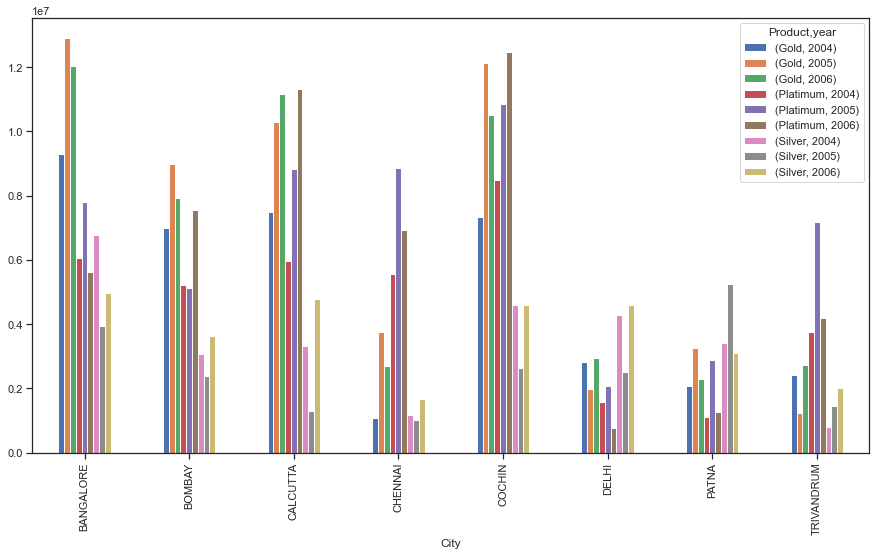

In [59]:
visualize.plot.bar(figsize=(15,8))
plt.show()

# 4 .Create graphs for
# a. Monthly comparison of total spends, city wise

In [62]:
data

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,2004
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,2004
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,2004


In [66]:
data["Month"] = pd.to_datetime(data["Month"])
data["month"] = data["Month"].dt.month_name()
visual = pd.pivot_table(data = data, index = 'month', columns='City',values='Amount', aggfunc='sum')
visual

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
month,,,,,,,,
April,6182081.72,3726382.34,6883832.96,3231144.38,7070107.83,2845176.75,2786278.83,2775772.32
August,1552898.45,1066744.75,2179294.85,681577.16,2582997.08,475893.81,813559.15,561400.55
December,722473.97,604939.17,456826.68,223628.27,2011774.32,967169.49,223902.41,640922.26
February,9875860.87,7813534.61,11449586.70,5866408.35,9459367.08,3072043.85,3466726.76,4459329.30
January,17782487.66,10681854.60,14163384.38,7649568.68,18692606.60,7373794.37,7388720.78,5688758.54
July,3737413.09,612457.59,2323261.43,1186667.37,1758023.02,488399.04,191003.23,960551.29
June,1382739.41,1486412.18,2693423.54,1903803.90,2738031.53,828262.78,1653183.92,828576.89
March,10765773.46,9857699.82,10076115.86,4413870.52,10733411.24,3386628.30,3795753.30,3855833.54
May,10743668.90,6974931.87,7868030.30,4422623.36,9912248.75,2638193.66,3476601.00,4631877.09


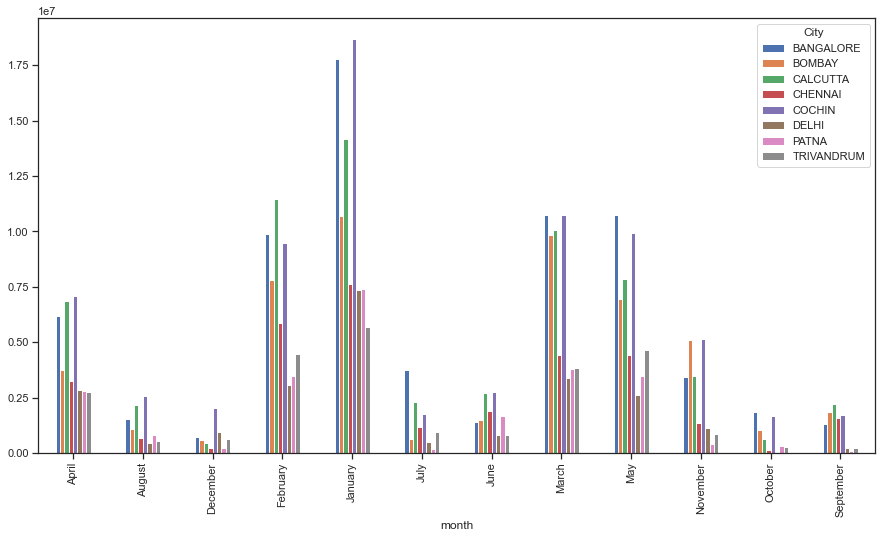

In [67]:
visual.plot.bar(figsize=(15,8))
plt.show()

# 4 b. Comparison of yearly spend on air tickets

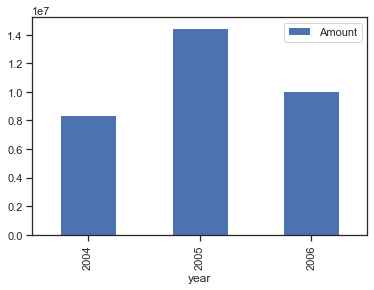

In [77]:
ticket = data.loc[(data.Type == 'AIR TICKET')]
vis = pd.pivot_table(data = ticket, index = 'year',values='Amount', aggfunc='sum')
vis.plot(kind ="bar")
plt.show()

# 4. c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

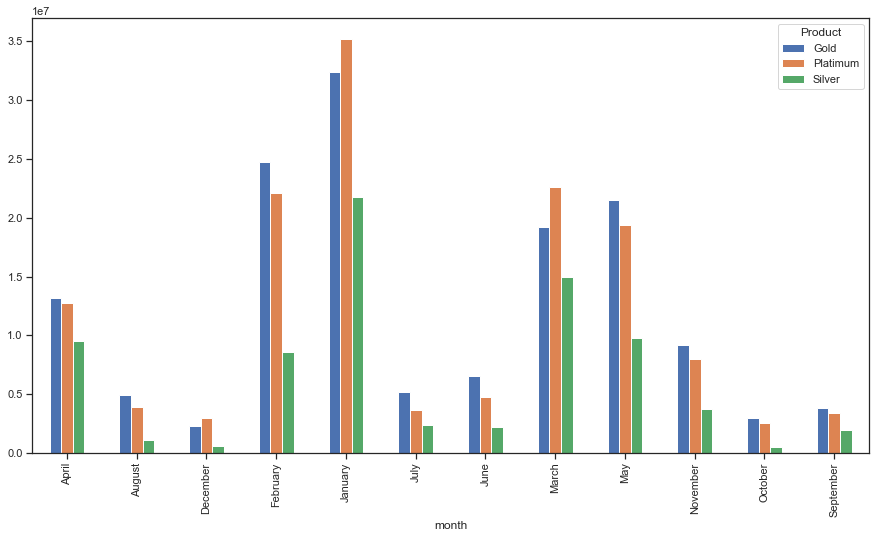

In [80]:
vis = pd.pivot_table(data = data, index = 'month', columns='Product', values='Amount', aggfunc='sum').plot.bar(figsize=(15,8))
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [46]:
data = pd.merge(left = custaq, right = repay, how = 'inner', left_on = 'Customer', right_on = 'Customer')
data

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,January
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,January
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,January
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73,January


In [35]:
Gold = data.loc[(data.Product == 'Gold')]
Gold

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January
...,...,...,...,...,...,...,...,...,...,...,...
1490,91,A91,41,BOMBAY,Gold,500000.0,C14,Govt,2006-04-03,247781.00,April
1491,92,A92,78,BANGALORE,Gold,500000.0,C15,Govt,2006-04-04,459105.69,April
1492,93,A93,56,DELHI,Gold,500000.0,C16,Govt,2004-01-12,342326.14,January
1493,94,A94,31,COCHIN,Gold,500000.0,C17,Govt,2004-01-03,153465.89,January


In [36]:
Silver = data.loc[(data.Product == 'Silver')]
Silver

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month
18,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,185955.07,January
19,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,412783.34,February
20,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,148038.67,April
21,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,179144.68,November
22,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-11-22,10274.00,November
...,...,...,...,...,...,...,...,...,...,...,...
1484,85,A85,59,CHENNAI,Silver,100001.0,C8,Govt,2006-03-28,270527.39,March
1485,86,A86,25,TRIVANDRUM,Silver,100002.0,C9,Govt,2006-03-29,295851.47,March
1486,87,A87,27,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,462283.02,March
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30,January


In [37]:
Platinum = data.loc[(data.Product == 'Platimum')]
Platinum

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month
29,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2004-01-15,84876.34,January
30,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2005-02-16,435829.71,February
31,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2005-04-27,336323.41,April
32,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2005-05-24,136493.67,May
33,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt,2004-11-23,233364.46,November
...,...,...,...,...,...,...,...,...,...,...,...
1470,71,A71,34,BOMBAY,Platimum,10002.0,C33,Self Employed,2004-09-13,56286.33,September
1482,83,A83,37,COCHIN,Platimum,10002.0,C6,Govt,2006-03-26,132844.13,March
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90,January
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57,January


In [56]:
def fun(product):
    if product == "Gold":
        df = Gold.groupby(["City","Customer"])[["Amount","month"]].sum().sort_values(by="Amount",ascending=False).head(10)
        return df
    elif product == "Silver":
        df = Silver.groupby(["City","Customer"])[["Amount","month"]].sum().sort_values(by="Amount",ascending=False).head(10)
        return df
    else:
        df = Platinum.groupby(["City","Customer"])[["Amount","month"]].sum().sort_values(by="Amount",ascending=False).head(10)
        return df
        
product = str(input("Enter the product:"))
output = pd.DataFrame()
output = fun(product)
display(output)

Enter the product:Silver


,,Amount
City,Customer,
BOMBAY,A22,9372561.68
PATNA,A46,7861541.41
BANGALORE,A23,6695551.74
COCHIN,A25,6649292.89
DELHI,A24,5958277.62
BANGALORE,A18,5309969.03
PATNA,A8,5278278.84
BANGALORE,A59,4775019.15
TRIVANDRUM,A57,4726420.73
